
# IR spectrum calculation

(sec:ir-tutorial)=

The infrared (IR) absorption process involves the absorption of light with low photon energy (from approx. 800 nm to approx. 1000 $\mu$m) which promotes the excitation of molecular vibrations. Of the entire IR photon energy range, the photons which excite fundamental vibrations of covalent bonds have energies in the range 2.5-25 $\mu$m {cite}`Norman2018, Centrone2015`. The absorbed photon energies (i.e. IR absorption peak positions) correspond to the molecular vibrational freqencies, while the IR intensities are related to the IR linear absorption cross-section {cite}`Norman2018`:
\begin{equation}
\sigma(\omega)= to\,\,be\,\,added
\end{equation}

These molecular vibrations constitute fingerprints of different functional groups present in the system and thus are very important for chemical characterization and molecular identification **to be refined, to add examples**.


The first step in an IR spectrum calculation is to determine the normal modes and frequencies which are obtained from the eigenstates and eigenvalues of the Hessian matrix. The Hessian collects all the second order derivatives of the energy ($E$) with respect to all nuclear coordinates (as exemplified below for a diatomic molecule AB where the atomic coordinates are denoted $A_x$, $A_y$, etc. **maybe remove?**):

\begin{equation}
\mathbf{H}= \begin{bmatrix}
\frac{\mathrm{d}^2E}{\mathrm{d}A^2_x} & \frac{\mathrm{d}^2E}{\mathrm{d}A_x\mathrm{d}A_y} & \frac{\mathrm{d}^2E}{\mathrm{d}A_x\mathrm{d}A_z} & \frac{\mathrm{d}^2E}{\mathrm{d}A_x\mathrm{d}B_x} & \frac{\mathrm{d}^2E}{\mathrm{d}A_x\mathrm{d}B_y} & \frac{\mathrm{d}^2E}{\mathrm{d}A_x\mathrm{d}B_z} \\
\frac{\mathrm{d}^2E}{\mathrm{d}A_y\mathrm{d}A_x} & \frac{\mathrm{d}^2E}{\mathrm{d}A^2_y} &  \frac{\mathrm{d}^2E}{\mathrm{d}A_y\mathrm{d}A_z} & \frac{\mathrm{d}^2E}{\mathrm{d}A_y\mathrm{d}B_x} & \frac{\mathrm{d}^2E}{\mathrm{d}A_y\mathrm{d}B_y} & \frac{\mathrm{d}^2E}{\mathrm{d}A_y\mathrm{d}B_z} \\
\frac{\mathrm{d}^2E}{\mathrm{d}A_z\mathrm{d}A_x} & \frac{\mathrm{d}^2E}{\mathrm{d}A_z\mathrm{d}A_y} & \frac{\mathrm{d}^2E}{\mathrm{d}A^2_z} &  \frac{\mathrm{d}^2E}{\mathrm{d}A_x\mathrm{d}B_x} & \frac{\mathrm{d}^2E}{\mathrm{d}A_x\mathrm{d}B_y} & \frac{\mathrm{d}^2E}{\mathrm{d}A_x\mathrm{d}B_z} \\
\frac{\mathrm{d}^2E}{\mathrm{d}B_x\mathrm{d}A_x} &  \frac{\mathrm{d}^2E}{\mathrm{d}B_x\mathrm{d}A_y} & \frac{\mathrm{d}^2E}{\mathrm{d}B_x\mathrm{d}A_z} & \frac{\mathrm{d}^2E}{\mathrm{d}B^2_x} &  \frac{\mathrm{d}^2E}{\mathrm{d}B_x\mathrm{d}B_y} & \frac{\mathrm{d}^2E}{\mathrm{d}B_x\mathrm{d}B_z} \\
\frac{\mathrm{d}^2E}{\mathrm{d}B_y\mathrm{d}A_x} &  \frac{\mathrm{d}^2E}{\mathrm{d}B_y\mathrm{d}A_y} & \frac{\mathrm{d}^2E}{\mathrm{d}B_y\mathrm{d}A_z} & \frac{\mathrm{d}^2E}{\mathrm{d}B_y\mathrm{d}B_x} & \frac{\mathrm{d}^2E}{\mathrm{d}B^2_y} &  \frac{\mathrm{d}^2E}{\mathrm{d}B_y\mathrm{d}B_z} \\
\frac{\mathrm{d}^2E}{\mathrm{d}B_z\mathrm{d}A_x} &  \frac{\mathrm{d}^2E}{\mathrm{d}B_z\mathrm{d}A_y} & \frac{\mathrm{d}^2E}{\mathrm{d}B_z\mathrm{d}A_z} & \frac{\mathrm{d}^2E}{\mathrm{d}B_z\mathrm{d}B_x} & \frac{\mathrm{d}^2E}{\mathrm{d}B_z\mathrm{d}B_x} & \frac{\mathrm{d}^2E}{\mathrm{d}B^2_z} \\
\end{bmatrix}
\end{equation}

The first step in a IR spectrum calculation is thus to determine the Hessian matrix. For the ground state, the Hessian can be determined [analytically](hessians:label), or numerically based on the analytical gradient.

In [8]:
# Import section
import veloxchem as vlx
import numpy as np
import sys

In [9]:
# Define the molecule and basis set
molecule_string = """
  O 0 0 0
  H 0 0 1.795239827225189
  H 1.693194615993441 0 -0.599043184453037"""
unit = "au"
basis_set_label = 'def2-svp'

molecule = vlx.Molecule.read_str(molecule_string, units=unit)
basis = vlx.MolecularBasis.read(molecule, basis_set_label)
ostream = vlx.OutputStream(sys.stdout)
ostream.print_block(molecule.get_string()) #TODO: show the molecular structure instead
ostream.flush()

                                              Molecular Geometry (Angstroms)                                              
                                                                                                                          
                          Atom         Coordinate X          Coordinate Y          Coordinate Z                           
                                                                                                                          
                           O           0.000000000000        0.000000000000        0.000000000000                         
                           H           0.000000000000        0.000000000000        0.950000004673                         
                           H           0.896000004407        0.000000000000       -0.317000001559                         
                                                                                                                          


In [10]:
# Run the scf calculation
method_settings = {}
scfdrv = vlx.ScfRestrictedDriver()
scfdrv.compute(molecule, basis)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [11]:
# Create the Hessian Driver and use it to compute an analytical SCF Hessian
hessian_settings = {'numerical': 'no'}
cphf_settings = {'use_subspace_solver':'no'}
hessian_drv = vlx.scfhessiandriver.ScfHessianDriver(scfdrv, scfdrv.comm, ostream)
hessian_drv.update_settings(method_settings, hessian_settings, cphf_settings)
hessian_drv.compute(molecule, basis)

                                                                                                                          
                                                    SCF Hessian Driver                                                    
                                                                                                                          
                                                                                                                          
                                       Coupled-Perturbed Hartree-Fock Solver Setup                                        
                                                                                                                          
                          Solver Type                     : Conjugate Gradient                                            
                          Max. Number of Iterations       : 150                                                           
                

In [13]:
hessian_drv.print_hessian(molecule)

                                           Analytical Hessian (Hartree/Bohr**2)                                           
                                          --------------------------------------                                          
                                                                                                                          
  Coord.       1 O(x)          1 O(y)          1 O(z)          2 H(x)          2 H(y)          2 H(z)          
                                                                                                                          
  1 O(x)       0.60158556      0.00000000     -0.15207252     -0.05695861     -0.00000000      0.02086391
  1 O(y)       0.00000000     -0.00252875      0.00000000     -0.00000000      0.00140155     -0.00000000
  1 O(z)      -0.15207252      0.00000000      0.71123729     -0.04125608     -0.00000000     -0.60022186
  2 H(x)      -0.05695861     -0.00000000     -0.04125608      0.05366250     

The normal modes and frequencies are then determined by diagonalizing the Hessian. First, the transation and rotational modes mut be projected out, leaving 3N-6 (or 3N-5 for a linear molecule) vibrational modes. This is done under the hood with the help of geomeTRIC. **add comparison vib-rot removed vs. included?**

The IR intensities are determined as discussed in more details in **add link**

In [14]:
hessian_drv.vibrational_analysis(molecule, basis)

                                                   Vibrational Analysis                                                   
                                                                                                                          
                 Harmonic frequencies (in cm**-1), force constants (in mdyne/A), reduced masses (in amu),                 
                                                IR intensities (in km/mol),                                               
                                         and Cartesian normal mode displacements.                                         
                                                                                                                          
                                                                                                                          
  Index:                        1                              2                              3               
  Frequency:                

In [73]:
def add_broadening(list_ex_energy, list_osci_strength, line_profile='Lorentzian', line_param=10, step=10):
        x_min = np.amin(list_ex_energy) - 50
        x_max = np.amax(list_ex_energy) + 50
        x = np.arange(x_min, x_max, step)
        y = np.zeros((len(x)))
        #print(x)
        #print(y)

        # go through the frames and calculate the spectrum for each frame
        for xp in range(len(x)):
            for e, f in zip(list_ex_energy, list_osci_strength):
                if line_profile == 'Gaussian':
                    y[xp] += f * np.exp(-(
                        (e - x[xp]) / line_param)**2)
                elif line_profile == 'Lorentzian':
                    y[xp] += 0.5 * line_param * f / (np.pi * (
                        (x[xp] - e)**2 + 0.25 * line_param**2))
        return x, y

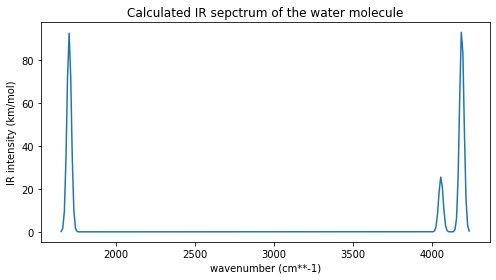

In [75]:
# plot the IR spectrum
from matplotlib import pyplot as plt

plt.figure(figsize=(7,4))
# Spectrum from -CHF 
x1,y1 = hessian_drv.frequencies, hessian_drv.ir_intensities
x1i, y1i = add_broadening(x1,y1,line_profile='Gaussian',line_param=20,step=10)
plt.plot(x1i,y1i)
#plt.plot(x1,y1,'x')
plt.xlabel('wavenumber (cm**-1)')
plt.ylabel('IR intensity (km/mol)')
plt.title("Calculated IR sepctrum of the water molecule")
plt.tight_layout(); plt.show()
# TODO: add comparison to expriment